## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results,on='Mouse ID')
# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print(f'The number of mice in the database is {df["Mouse ID"].count()}')

The number of mice in the database is 1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_grouped = df.groupby('Mouse ID', as_index=False).agg({'Timepoint':['count','max']})
df_grouped

Mouse ID Timepoint    
                 count max
0       a203        10  45
1       a251        10  45
2       a262        10  45
3       a275        10  45
4       a366         7  30
..       ...       ...  ..
244     z435         3  10
245     z578        10  45
246     z581        10  45
247     z795        10  45
248     z969        10  45

[249 rows x 3 columns]

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
df_opt = df.groupby('Mouse ID', as_index=False).max()
df_opt

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_cleaned = df.drop_duplicates(subset='Mouse ID', keep='last').reset_index(drop=True)
df_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Checking the number of mice in the clean DataFrame.
print(f'The number of mice in the clean DataFrame is {df_cleaned["Mouse ID"].count()}')

The number of mice in the clean DataFrame is 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
df_dr = df_cleaned[['Drug Regimen','Tumor Volume (mm3)']]
df_dr_mean = df_dr.groupby('Drug Regimen', as_index=False).mean()
df_dr_mean = df_dr_mean.rename(columns={'Tumor Volume (mm3)':'mean'})

df_dr_median = df_dr.groupby('Drug Regimen', as_index=False).median()
df_dr_median = df_dr_median.rename(columns={'Tumor Volume (mm3)':'median'})

df_dr_var = df_dr.groupby('Drug Regimen', as_index=False).var()
df_dr_var = df_dr_var.rename(columns={'Tumor Volume (mm3)':'var'})

df_dr_std = df_dr.groupby('Drug Regimen').std().reset_index(drop=False)
df_dr_std = df_dr_std.rename(columns={'Tumor Volume (mm3)':'std dev'})

df_dr_sem = df_dr.groupby('Drug Regimen').sem().reset_index(drop=False)
df_dr_sem = df_dr_sem.rename(columns={'Tumor Volume (mm3)':'sem'})

df_dr = df_dr_mean.merge(df_dr_median.merge(df_dr_var.merge(df_dr_std.merge(df_dr_sem, on='Drug Regimen'),
                                                           on='Drug Regimen'), on='Drug Regimen'), on='Drug Regimen')
df_dr.set_index('Drug Regimen')
df_dr

,Drug Regimen,mean,median,var,std dev,sem
0,Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
1,Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
2,Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
3,Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
4,Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
5,Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
6,Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
7,Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
8,Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056
9,Zoniferol,59.181258,61.840058,76.862027,8.767099,1.753420


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df_agg = df_cleaned[['Drug Regimen','Tumor Volume (mm3)']]
df_agg = df_agg.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
df_agg

Tumor Volume (mm3)                                            
                           mean     median         var        std       sem
Drug Regimen                                                               
Capomulin             36.667568  38.125164   32.663378   5.715188  1.143038
Ceftamin              57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol             58.178246  60.165180   74.010875   8.602957  1.720591
Ketapril              62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol              61.205757  63.283288  106.029927  10.297083  2.059417
Placebo               60.508414  62.030594   78.759797   8.874672  1.774934
Propriva              56.736964  55.841410   69.349002   8.327605  1.665521
Ramicane              36.191390  36.561652   32.166354   5.671539  1.134308
Stelasyn              61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol             59.181258  61.840058   76.862027   8.767099  1.753420

## Bar and Pie Charts

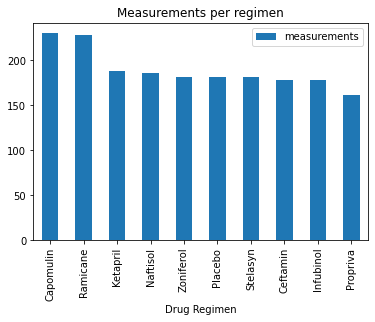

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
df_number = df.groupby('Drug Regimen',as_index=False).count()
df_number = df_number.rename(columns={'Mouse ID':'measurements'})
df_number = df_number.sort_values(by='measurements', ascending=False)
df_number.plot.bar(x='Drug Regimen', y='measurements',title='Measurements per regimen')

<function matplotlib.pyplot.show(*args, **kw)>

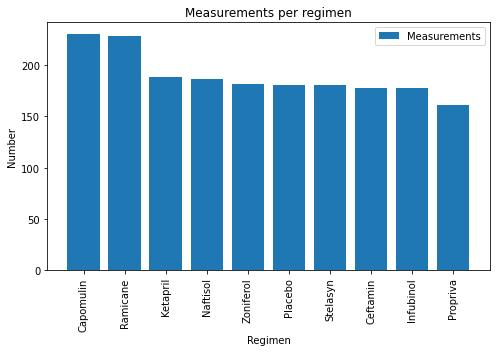

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = df_number['Drug Regimen'].tolist()
number = df_number['measurements'].tolist()

plt.figure(figsize=(7,5))
plt.bar(x_axis,number,label='Measurements')
plt.title('Measurements per regimen')
plt.xlabel('Regimen')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show

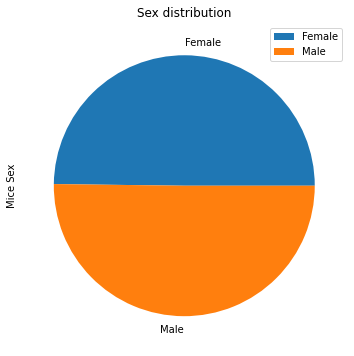

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_chart = df_cleaned.groupby('Sex').count()
pie_chart = pie_chart.rename(columns={'Mouse ID':'Mice Sex'})
pie_chart.plot(kind='pie',y='Mice Sex',title='Sex distribution',figsize=(6,6))


#pie_chart

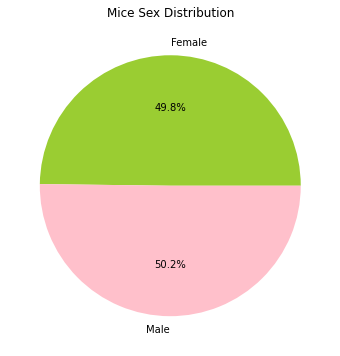

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count = pie_chart['Mice Sex'].tolist()
sex = ['Female','Male']
colors = ['yellowgreen','pink']
plt.figure(figsize=(6,6))
plt.pie(count, labels = sex, colors = colors, autopct='%1.1f%%')
plt.title('Mice Sex Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

df_q = pd.concat([df_cleaned[df_cleaned['Drug Regimen'] == 'Capomulin'],df_cleaned[df_cleaned['Drug Regimen'] == 'Ramicane'],
                 df_cleaned[df_cleaned['Drug Regimen'] == 'Infubinol'],df_cleaned[df_cleaned['Drug Regimen'] == 'Ceftamin']])
df_q = df_q.reset_index(drop=True)
df_q

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,f966,Capomulin,Male,16,17,20,30.485985,0
4,u364,Capomulin,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...,...
95,x226,Ceftamin,Male,23,28,0,45.000000,0
96,x581,Ceftamin,Female,19,28,45,64.634949,3
97,x822,Ceftamin,Male,3,29,45,61.386660,3
98,y769,Ceftamin,Female,6,27,45,68.594745,4


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = df_q['Drug Regimen'].tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = df_q['Tumor Volume (mm3)']
cap = []
ram = []
inf = []
cef = []

r = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f'The lower quartile is {lowerq}, the upper one is {upperq} and the iqr is {iqr}')
print('-'*30)

    # Locate the rows which contain mice on each drug and get the tumor volumes

for i in df_q['Drug Regimen'].values:
    if i == 'Capomulin':
        cap.append(df_q.loc[r,'Tumor Volume (mm3)'])
    elif i == 'Ramicane':
        ram.append(df_q.loc[r,'Tumor Volume (mm3)'])
    elif i == 'Infubinol':
        inf.append(df_q.loc[r,'Tumor Volume (mm3)'])
    elif i == 'Ceftamin':
        cef.append(df_q.loc[r,'Tumor Volume (mm3)'])
    r += 1
cap_df = pd.DataFrame({'TV':cap})
ram_df = pd.DataFrame({'TV':ram})
inf_df = pd.DataFrame({'TV':inf})
cef_df = pd.DataFrame({'TV':cef})
    # add subset 
    
    # Determine outliers using upper and lower bounds
iq_cap = cap_df['TV'].quantile([.25,.5,.75])
lowerq_cap = iq_cap[0.25]
upperq_cap = iq_cap[0.75]
iqr_cap = upperq_cap - lowerq_cap

lb_cap = lowerq_cap - (1.5 * iqr_cap)
ub_cap = upperq_cap + (1.5 * iqr_cap)
print(f'The lower quartile for Capomulin is {lowerq_cap}, the upper one is {upperq_cap} and the iqr is {iqr_cap}')
print(f'Values under {lb_cap} and above {ub_cap} may be outliers')
print('-'*30)


iq_ram = ram_df['TV'].quantile([.25,.5,.75])
lowerq_ram = iq_ram[0.25]
upperq_ram = iq_ram[0.75]
iqr_ram = upperq_ram - lowerq_ram

lb_ram = lowerq_ram - (1.5 * iqr_ram)
ub_ram = upperq_ram + (1.5 * iqr_ram)
print(f'The lower quartile for Ramicane is {lowerq_ram}, the upper one is {upperq_ram} and the iqr is {iqr_ram}')
print(f'Values under {lb_ram} and above {ub_ram} may be outliers')
print('-'*30)

iq_inf = inf_df['TV'].quantile([.25,.5,.75])
lowerq_inf = iq_inf[0.25]
upperq_inf = iq_inf[0.75]
iqr_inf = upperq_inf - lowerq_inf

lb_inf = lowerq_inf - (1.5 * iqr_inf)
ub_inf = upperq_inf + (1.5 * iqr_inf)
print(f'The lower quartile for Infubinol is {lowerq_inf}, the upper one is {upperq_inf} and the iqr is {iqr_inf}')
print(f'Values under {lb_inf} and above {ub_inf} may be outliers')
print('-'*30)

iq_cef = cef_df['TV'].quantile([.25,.5,.75])
lowerq_cef = iq_cef[0.25]
upperq_cef = iq_cef[0.75]
iqr_cef = upperq_cef - lowerq_cef

lb_cef = lowerq_cef - (1.5 * iqr_cef)
ub_cef = upperq_cef + (1.5 * iqr_cef)
print(f'The lower quartile for Ceftamin is {lowerq_cef}, the upper one is {upperq_cef} and the iqr is {iqr_cef}')
print(f'Values under {lb_cef} and above {ub_cef} may be outliers')

The lower quartile is 37.187743802499995, the upper one is 59.930261755000004 and the iqr is 22.74251795250001
------------------------------
The lower quartile for Capomulin is 32.37735684, the upper one is 40.1592203 and the iqr is 7.781863460000004
Values under 20.70456164999999 and above 51.83201549 may be outliers
------------------------------
The lower quartile for Ramicane is 31.56046955, the upper one is 40.65900627 and the iqr is 9.098536719999998
Values under 17.912664470000003 and above 54.30681135 may be outliers
------------------------------
The lower quartile for Infubinol is 54.04860769, the upper one is 65.52574285 and the iqr is 11.477135160000003
Values under 36.83290494999999 and above 82.74144559000001 may be outliers
------------------------------
The lower quartile for Ceftamin is 48.72207785, the upper one is 64.29983003 and the iqr is 15.577752179999997
Values under 25.355449580000002 and above 87.66645829999999 may be outliers


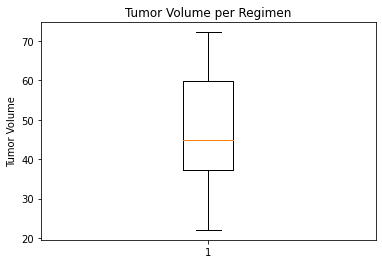

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = np.concatenate((cap,ram,inf,cef))
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume per Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(data)
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

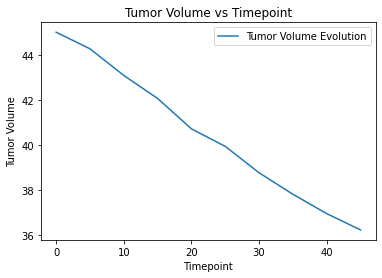

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lineplot = df[df['Drug Regimen'] == 'Capomulin']
lineplot = lineplot.groupby('Timepoint', as_index=False).mean()

plt.plot(lineplot['Timepoint'],lineplot['Tumor Volume (mm3)'], label='Tumor Volume Evolution')
plt.title('Tumor Volume vs Timepoint')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.legend()
plt.show

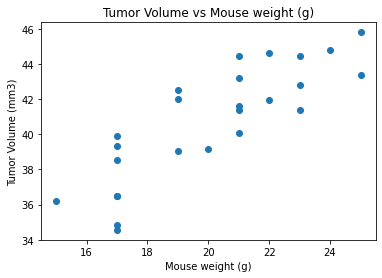

(0.8419363424694717, 1.322572243471279e-07)


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatterplot = df[df['Drug Regimen'] == 'Capomulin']
scatterplot = scatterplot.groupby('Mouse ID').mean()

x_values = scatterplot['Weight (g)']
y_values = scatterplot['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Mouse weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Mouse weight (g)')
plt.show()
print(st.pearsonr(x_values,y_values))

## Correlation and Regression

The regression equation is: y = 0.95x + 21.55
The correlation coefficient is: (0.8419363424694717, 1.322572243471279e-07)


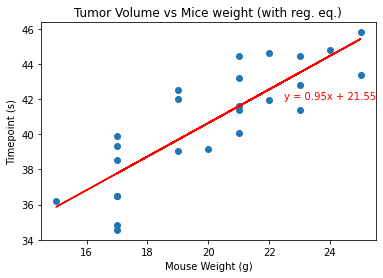

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The regression equation is: {line_eq}')
print(f'The correlation coefficient is: {st.pearsonr(x_values,y_values)}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (22.5,42), fontsize=10, color='red')
plt.title('Tumor Volume vs Mice weight (with reg. eq.)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Timepoint (s)')
plt.show()

In [19]:
#Bonus: if a mouse weights 35 grams and is under the Capomulin regimen, the expected volume of the tumor will be:
mw = 35
etv = mw * slope + intercept

print(f'The expected tumor volume of that mouse is: {round(etv,2)}')

The expected tumor volume of that mouse is: 54.96
